## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

    
<li>*Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM</li>
<li>*Предложите свои варианты решения проблемы исчезающего градиента в RNN</li>
</ol>

In [25]:
import numpy
import pandas
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [26]:
def newdf(df):
    input_data, output_data = [], []
    for i in range(len(df) - 1):
        input_data.append(df[i:i+1])
        output_data.append(df[i+1])
    return numpy.array(input_data), numpy.array(output_data)

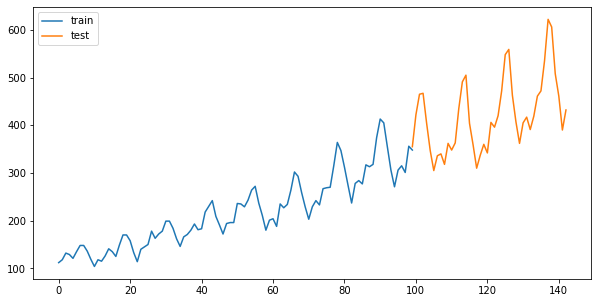

In [27]:
dataframe = pandas.read_csv('airline-passengers.csv')
dataframe.head()
dataset = dataframe['Passengers'].values
dataset = dataset.astype('float32')
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]
plt.figure(figsize=[10, 5])
plt.plot(train,label='train')
plt.plot(range(len(train) - 1, len(train) - 1 + len(test)), test, label='test')
plt.legend()
plt.show()

In [28]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348.], dtype=float32)

In [29]:
train_input, train_output = newdf(train)
test_input, test_output = newdf(test)
len(train_input), len(train_output)

(99, 99)

In [30]:
train_output

array([118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118.,
       115., 126., 141., 135., 125., 149., 170., 170., 158., 133., 114.,
       140., 145., 150., 178., 163., 172., 178., 199., 199., 184., 162.,
       146., 166., 171., 180., 193., 181., 183., 218., 230., 242., 209.,
       191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
       237., 211., 180., 201., 204., 188., 235., 227., 234., 264., 302.,
       293., 259., 229., 203., 229., 242., 233., 267., 269., 270., 315.,
       364., 347., 312., 274., 237., 278., 284., 277., 317., 313., 318.,
       374., 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.],
      dtype=float32)

In [31]:
train_input = train_input.reshape(train_input.shape[0], 1, train_input.shape[1])
test_input = test_input.reshape(test_input.shape[0], 1, test_input.shape[1])

In [32]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_input, train_output, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
99/99 - 1s - loss: 52620.5039 - mae: 217.3164
Epoch 2/100
99/99 - 0s - loss: 49475.8555 - mae: 209.8792
Epoch 3/100
99/99 - 0s - loss: 43405.1211 - mae: 194.9753
Epoch 4/100
99/99 - 0s - loss: 36151.0312 - mae: 175.1212
Epoch 5/100
99/99 - 0s - loss: 29196.4883 - mae: 153.6725
Epoch 6/100
99/99 - 0s - loss: 22921.6406 - mae: 132.1015
Epoch 7/100
99/99 - 0s - loss: 17560.3438 - mae: 109.8620
Epoch 8/100
99/99 - 0s - loss: 13019.9053 - mae: 90.0515
Epoch 9/100
99/99 - 0s - loss: 9900.3184 - mae: 76.8556
Epoch 10/100
99/99 - 0s - loss: 7890.5801 - mae: 68.5321
Epoch 11/100
99/99 - 0s - loss: 6645.5435 - mae: 62.4342
Epoch 12/100
99/99 - 0s - loss: 5696.0557 - mae: 58.2175
Epoch 13/100
99/99 - 0s - loss: 4992.2812 - mae: 53.9316
Epoch 14/100
99/99 - 0s - loss: 4479.5249 - mae: 51.9678
Epoch 15/100
99/99 - 0s - loss: 4149.6953 - mae: 50.6541
Epoch 16/100
99/99 - 0s - loss: 3930.8567 - mae: 48.9382
Epoch 17/100
99/99 - 0s - loss: 3778.8645 - mae: 48.5615
Epoch 18/100
99/99 - 0s -

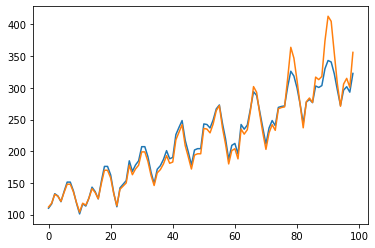

In [33]:
train_predict = model.predict(train_input)
test_predict = model.predict(test_input)
train_predict.reshape(train_predict.shape[0])
plt.plot(train_predict, label='train_preedict')
plt.plot(train_input.flatten(), label='train_input')
plt.show()

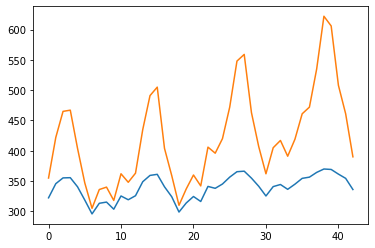

In [34]:
test_predict.reshape(test_predict.shape[0])
plt.plot(test_predict, label='test_preedict')
plt.plot(test_input.flatten(), label='test_input')
plt.show()

Результаты:
* На обучающей выборке: результат очень точный
* На тестовой выборке: результат средней точности. Можно увидеть только места максимумов, но не их выличину.
* Протестировано с разным поличеством слоёв, но результат примерно одинаков
* Разное количество слоев дает примерно тот же результат, что и один слой.
* Увеличение количества нейронов от 32 до 512 не дает каких-либо существенных улучшений точности предсказания.